# Assignment 4: Spatial Spectral Pulses



In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys

from scipy.special import j1
def jinc(r):
    #
    return j1(r*np.pi)/(2*r)

def rect(r):
    #1 from -0.5 to 0.5. 
    #rect(r/(2*kmax)) yields 1 from -kmax to kmax. 
    return 0.5*(np.sign(r+0.5) + np.sign(0.5 - r))


a) True Null Pulse Design:
 Design a true null spectral-spatial pulse, with a spatial SBW =
4 profile, and a spectral T BW = 4 profile. For convenience, assume the gradient slew rate is
unlimited, so the gradient sublobes are perfect rectangles. Also for convenience, assume the lipid
null is centered at 250 Hz from water. Design for a 1 cm slice, and spectral passband of ±125 Hz.
Sample the RF and gradient waveforms at 10 us. Plot the RF and gradient waveforms.

Slice Thickness: 0.5162795860470278 cm


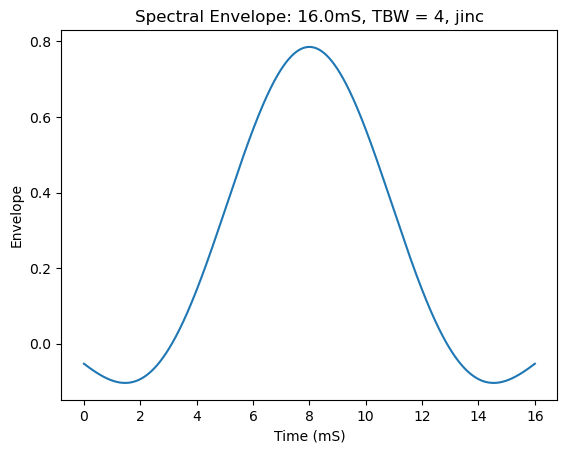

In [2]:
 #Hz/Gauss; the 1T gyromagnetic ratio. 
gyro = 4257# Hz/gauss
lipid_null = 250#Hz
lipid_null = 125
side_lobe = 2*lipid_null

#TRUE NULL PULSE:
# side lobe set at 2x lipid freq, delT is 2x side lobe width

#Setting spatial envelope:
g_max = 1.82 #G/cm #Setting g_max to make slice thickness 1 cm. 
subpulse_time = 1/(2*side_lobe)
#subpulse_time = 1/(side_lobe)
kmax = subpulse_time*g_max* gyro  /2 #Hz/Gauss
dZ = 1/kmax
SBW = 4
slice_thicknes = dZ*SBW #Question- why is it not dZ/TBW? I think of higher TBW as higher resolution. 
print(f"Slice Thickness: {slice_thicknes} cm")
#Setting spectral envelope:
TBW = 4
T_total = TBW/(2*lipid_null) 
#T_total = TBW*(2*lipid_null)
#This sets a master envelope for pulse. 
#t= np.linspace(0,T_total,int(T_total/10E-6))#sample every 10 us
t= np.linspace(0,T_total,int(T_total/10E-6))#sample every 10 us
spectral_jinc_envelope = jinc(TBW*(t/T_total-0.5))
plt.title(f"Spectral Envelope: {T_total*1E3}mS, TBW = {TBW}, jinc")
plt.plot(t*1E3,spectral_jinc_envelope)
plt.xlabel("Time (mS)")
plt.ylabel("Envelope")
plt.show()



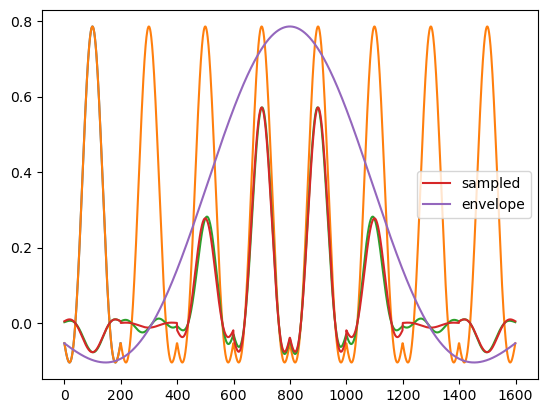

In [3]:
subpulse_sample_count = int(subpulse_time/10E-6)
t_sub = np.linspace(0,subpulse_time,subpulse_sample_count)
subpulse = jinc(SBW*(t_sub/subpulse_time-0.5))
plt.plot(subpulse)

sampled_pulse_train = np.zeros(len(spectral_jinc_envelope))
for i in range(int(T_total/subpulse_time)):
    t_index = np.argmin(np.abs(t-(i+0.5)*subpulse_time))
    adjusted = subpulse *spectral_jinc_envelope[t_index]
    #print(t_index)
    sampled_pulse_train[(i*subpulse_sample_count):(i+1)*subpulse_sample_count] = adjusted
    #plt.plot(adjusted)
    
#Janky envelope method:
subpulse_train = np.tile(subpulse,  int(T_total/subpulse_time))
plt.plot(subpulse_train)
plt.plot(subpulse_train*spectral_jinc_envelope)
plt.plot(sampled_pulse_train, label='sampled')
plt.plot(spectral_jinc_envelope, label='envelope')
plt.legend()



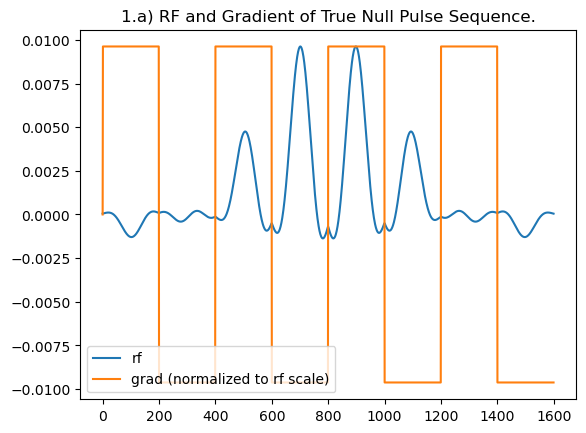

In [4]:

rf = sampled_pulse_train
rf = subpulse_train*spectral_jinc_envelope  #much simpler to generate and almost exactly the same. 

rf = np.pi/2/np.sum(rf)*rf
gradx = g_max*np.sign(np.sin(np.pi*1/subpulse_time*t)) #infinite slew, move left and right very fast. 

plt.figure()
plt.title('1.a) RF and Gradient of True Null Pulse Sequence.')
plt.plot(rf, label='rf')
plt.plot(gradx/np.max(gradx)*np.max(rf), label='grad (normalized to rf scale)')
plt.legend()
plt.show()


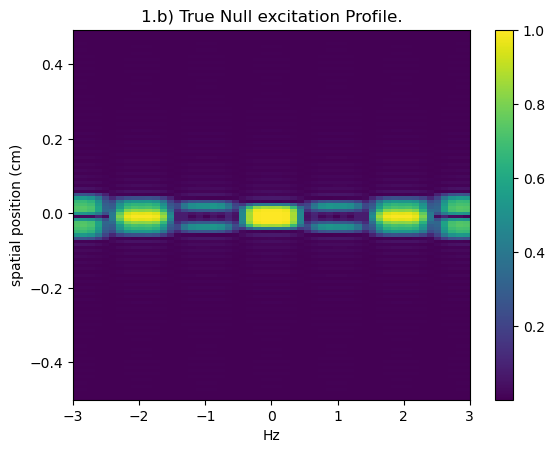

In [ ]:
from ab2ex import *
from abrm import *

dt = 0.01 #mS, so 0.01 is 10uS
gy = np.pi/2*dt*np.ones(len(rf))

gs = gradx + 1j*gy
x = np.arange(-0.5,0.5, 0.1/12)
y = np.linspace(-1/dt*1,1/dt*1, 55 ) #dt in mS. So +-1 is in kHz. Side lobes are hopefully +- 125Hz, so need high resolution to see. 

y = np.linspace(-side_lobe/1000*12,side_lobe/1000*12, 55 ) #Convert sidelobe khz to Hz and show me 4,(8) of them
#Sidelobes should be at 250Hz. 
a,b = abrm_vectorized(rf,gs,x,y)
mxy1 = ab2ex(a,b)

plt.figure()
plt.title('1.b) True Null excitation Profile.')
plt.imshow(np.abs(mxy1), label="|Mxy| excitation",extent=[y.min(), y.max(), x.min(), x.max()],aspect='auto')
plt.colorbar()
plt.xlabel("kHz")
plt.ylabel("spatial position (cm)")
plt.show()



In [6]:
side_lobe

250

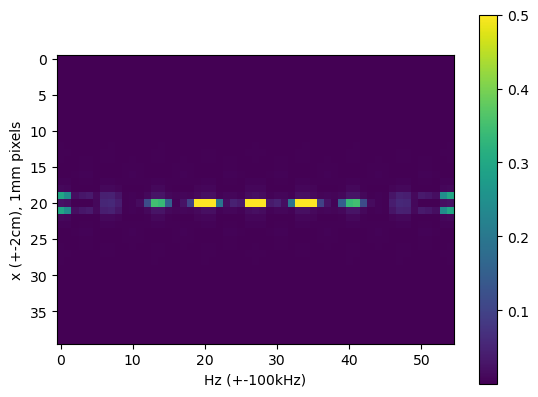

In [7]:
from ab2ex import *
from abrm import *

dt = 0.01 #mS, so 0.01 is 10uS 100kHz
gy = np.pi*2*dt*np.ones(len(rf))

gs = gradx + 1j*gy
x = np.arange(-2,2, 0.1)
y = np.linspace(-1/dt*0.02,1/dt*0.02, 55 ) #+- 1Khz
#y = np.linspace(-1,1, 55 ) #dt in mS. So +-1 is in kHz. Side lobes are hopefully +- 125Hz, so need high resolution to see. 
a,b = abrm(rf,gs,x,y)
mxy1 = ab2ex(a,b)

plt.figure()
plt.imshow(np.abs(mxy1), vmax=0.5, label="|Mxy| excitation")
plt.colorbar()
plt.xlabel("Hz (+-100kHz)")
plt.ylabel("x (+-2cm), 1mm pixels")
plt.show()



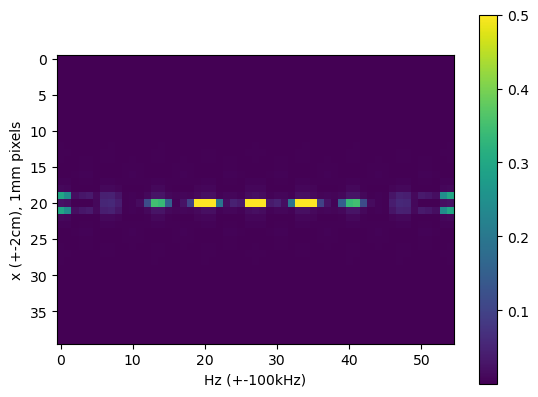

In [8]:

plt.figure()
plt.imshow(np.abs(mxy1), vmax=0.5, label="|Mxy| excitation")
plt.colorbar()
plt.xlabel("Hz (+-100kHz)")
plt.ylabel("x (+-2cm), 1mm pixels")
plt.show()